In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 로드
df = pd.read_csv('./data/gym_churn_us.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
print(df.describe())

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

In [6]:
# 결측치 확인
print(df.isnull().sum())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


#### 모든 변수에 대해 분포 시각화

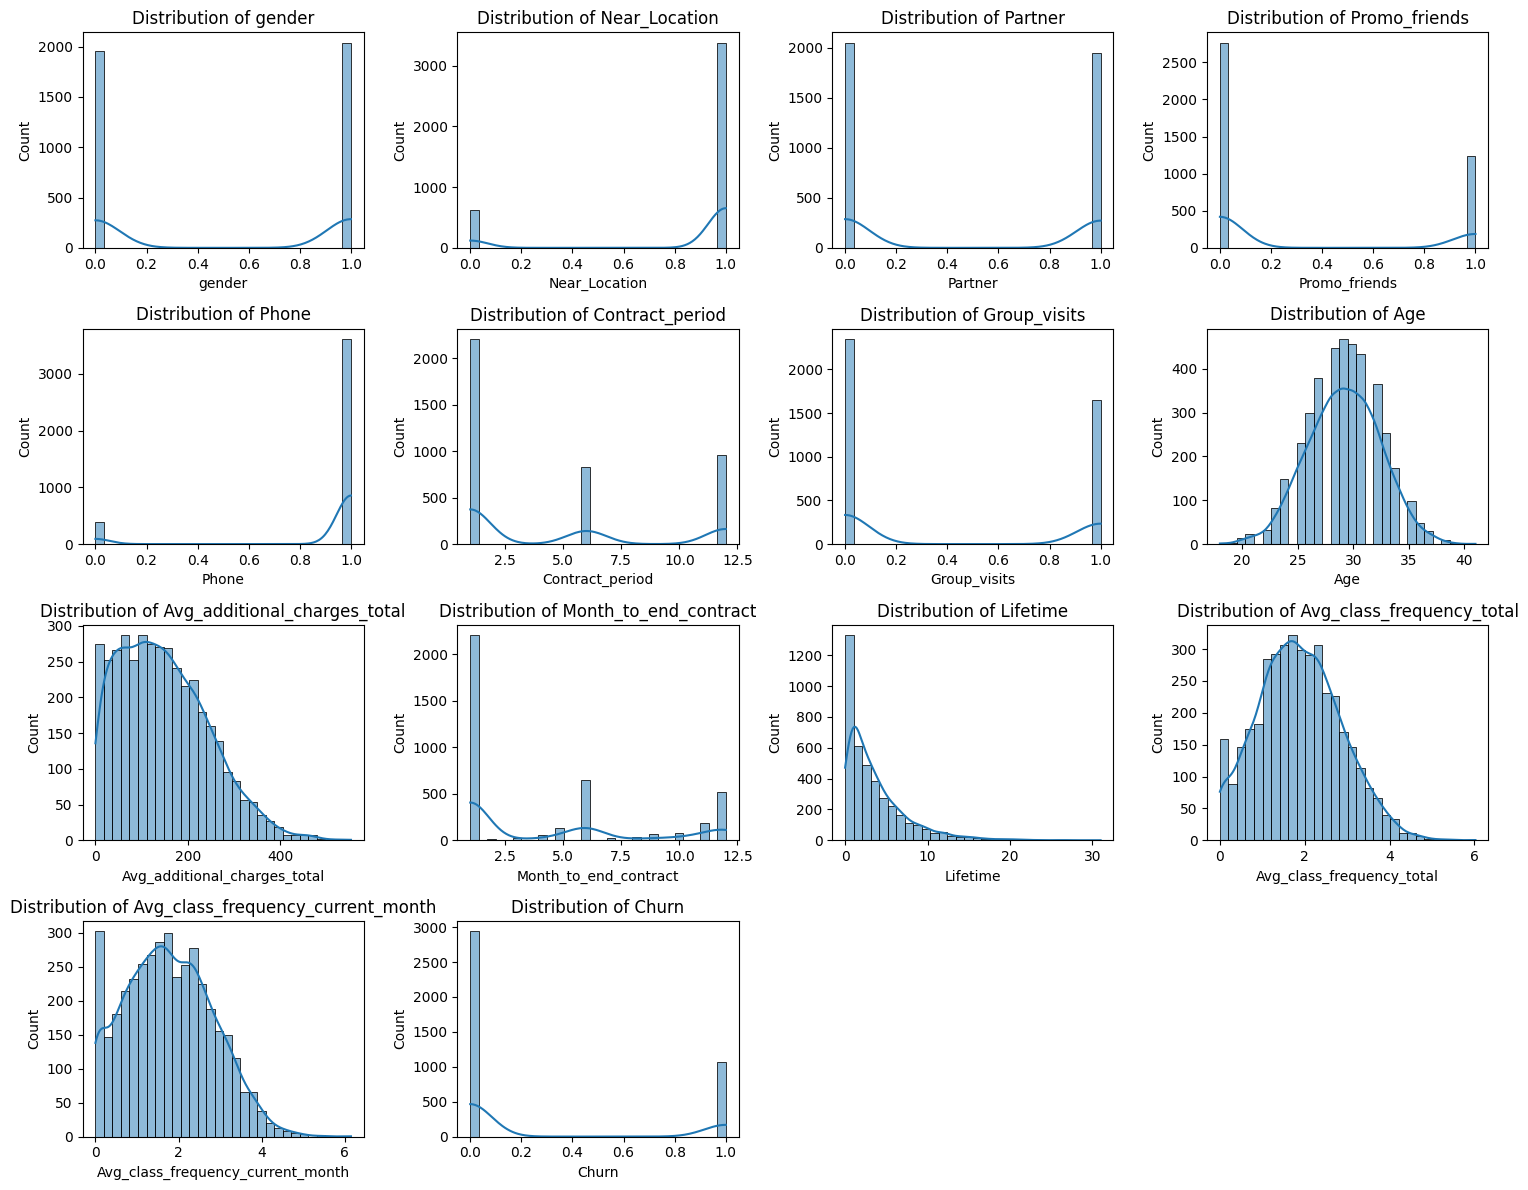

In [7]:
numeric_features = df.select_dtypes(include=['number']).columns

# 데이터 분포 시각화
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.savefig("./image/numeric_features_distribution.png")
plt.show()

## 상관관계 분석

- 고객 이탈과 연관성이 높은 features 찾기

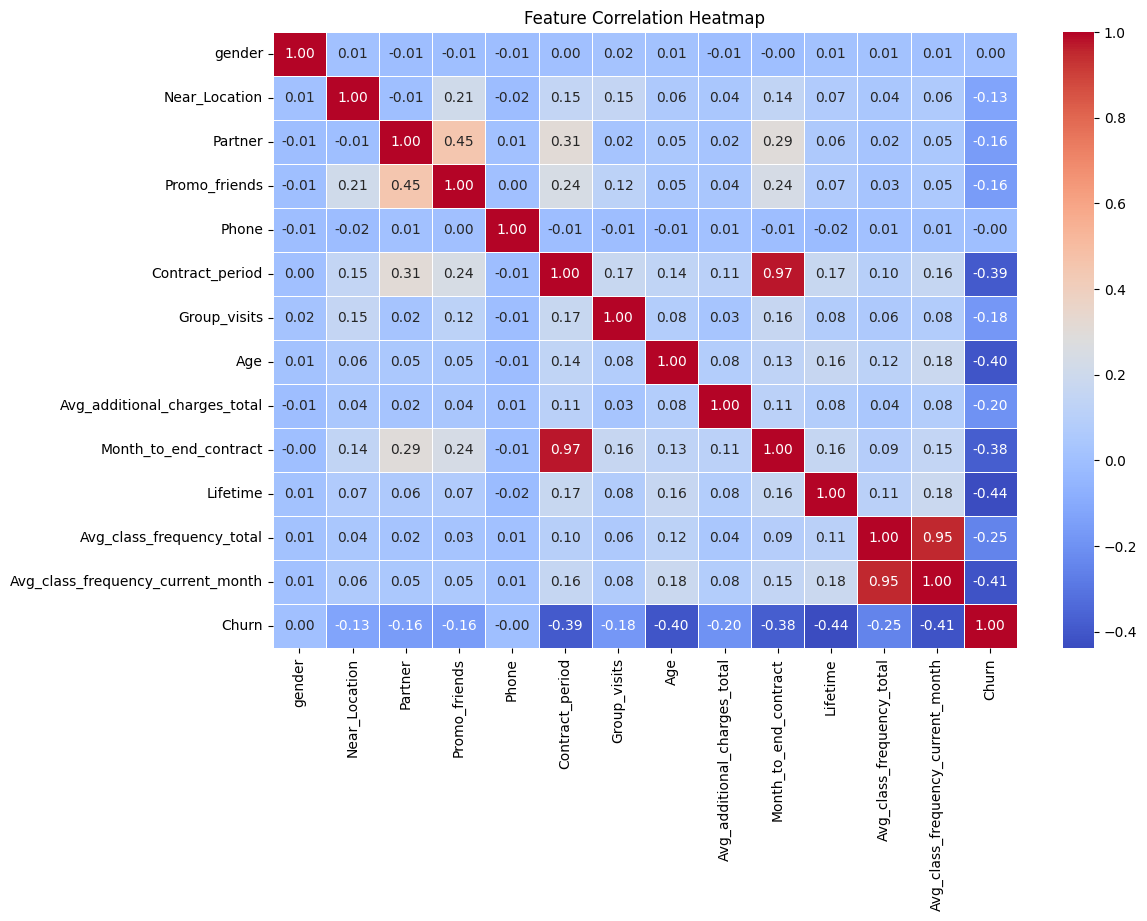

In [8]:
# 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=['number'])

# 상관관계 행렬 계산
corr_matrix = numeric_df.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("./image/feature_correlation_heatmap.png")
plt.show()

##### 결론 
- Lifetime: -0.44 (가입 기간이 길수록 이탈 확률 감소)
- Avg_class_frequency_current_month: -0.41 (최근 운동 빈도가 높을수록 이탈 확률 감소)
- Age: -0.40 (나이가 많을수록 이탈 확률 감소)
- Contract_period: -0.39 (계약 기간이 길수록 이탈 확률 감소)
- Month_to_end_contract: -0.38 (계약이 끝나갈수록 이탈 확률 증가)

즉, **가입 기간이 길고, 최근 운동을 많이 하고, 나이가 많으며, 계약 기간이 길수록** 이탈할 확률이 낮음. 반대로, **계약이 끝나갈수록 이탈할 가능성이 높아지는 것** 확인 <br>

-> 이걸 바탕으로 **장기 회원 유지 전략**이나 **계약 연장 유도 프로모션**을 고민하면 좋을 듯 함

----

- 고객의 추가 지출 금액 vs. 운동 빈도 → 지출이 많을수록 운동을 많이 하는지 확인

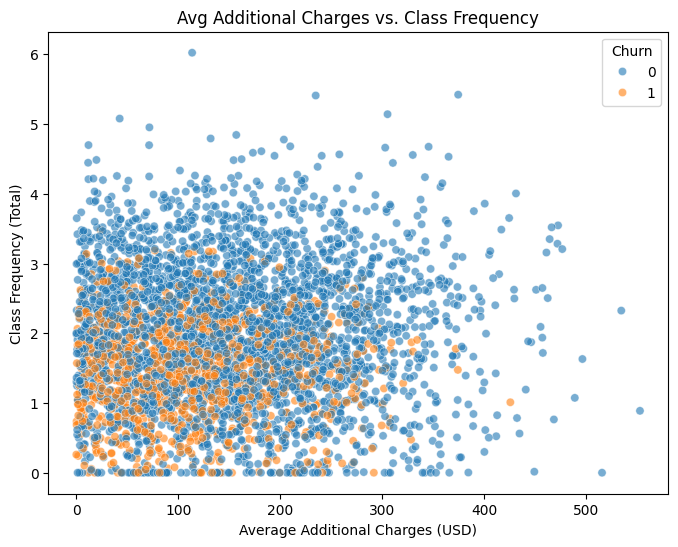

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Avg_additional_charges_total", y="Avg_class_frequency_total", hue="Churn", alpha=0.6)
plt.title("Avg Additional Charges vs. Class Frequency")
plt.xlabel("Average Additional Charges (USD)")
plt.ylabel("Class Frequency (Total)")
plt.legend(title="Churn")
plt.savefig("./image/Avg_Additional_Charges_Class_Frequency.png")
plt.show()

**결론**
- 고객의 추가 지출 금액이 많을수록 운동 빈도가 반드시 증가하는 것은 아니며, 두 변수 간의 관계는 복잡하고 다른 요인들이 영향을 미칠 가능성이 큼

------

- 고객 연령 vs. 평균 지출 금액 → 연령이 높을 수록 지출이 많아지는 지 확인

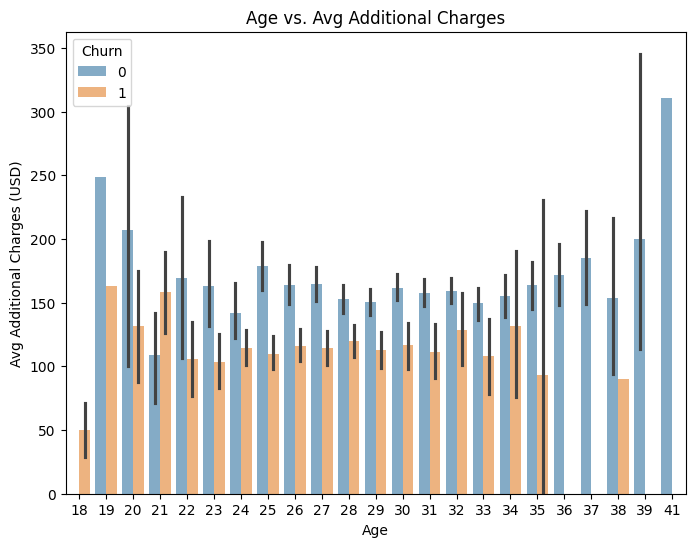

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="Age", y="Avg_additional_charges_total", hue="Churn", alpha=0.6)
plt.title("Age vs. Avg Additional Charges")
plt.xlabel("Age")
plt.ylabel("Avg Additional Charges (USD)")
plt.legend(title="Churn")
plt.savefig("./image/Age_Avg_Additional_Charges.png")
plt.show()


**결론**
- 고객의 연령이 높아질수록 평균 지출 금액이 증가하는 경향이 있으며, 이탈하지 않은 고객이 더 많은 지출을 하는 경향이 있음을 보여줌

-----

- 월평균 방문 횟수 vs. 계약 기간 → 방문 빈도가 높을수록 장기 계약을 하는지 분석.

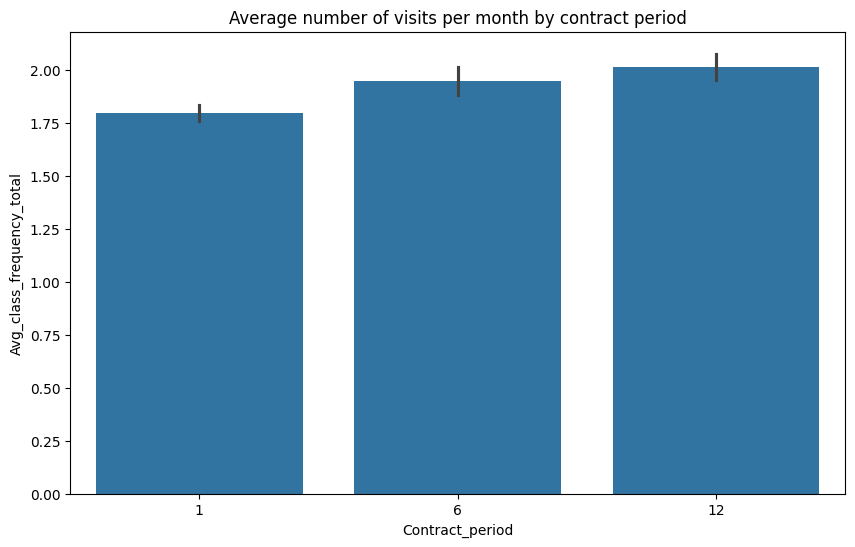

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract_period', y='Avg_class_frequency_total', data=df)
plt.title('Average number of visits per month by contract period')
plt.xlabel('Contract_period')
plt.ylabel('Avg_class_frequency_total')
plt.savefig("./image/Avg_num_visits_month_by_contract_period.png")
plt.show()

**결론**
- 월평균 방문 횟수가 증가할수록 장기 계약(6개월, 12개월)을 하는 경향이 있는 것으로 분석할 수 있습니다. 고객들은 계약 기간이 길어질수록 더 자주 방문하는 경향이 있음을 알 수 있음

-----

- 추가 지출 금액의 분포

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12320\166090480.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Avg_additional_charges_total', kde=True, palette='viridis')


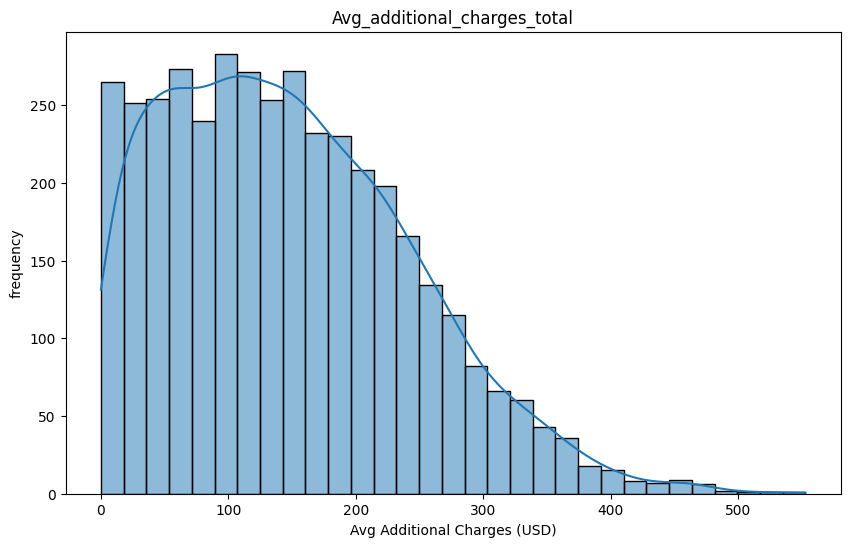

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Avg_additional_charges_total', kde=True, palette='viridis')
plt.title('Avg_additional_charges_total')
plt.xlabel('Avg Additional Charges (USD)')
plt.ylabel('frequency')
plt.savefig("./image/Avg_additional_charges_total.png")
plt.show()


**결론**
- 추가 지출 금액의 분포는 대부분의 고객이 낮은 지출을 하고 있으며, 높은 지출을 하는 고객은 드물다는 것을 보여줌

----

#### 이탈 고객과 유지 고객 비교
- 이탈 여부 (1 = 헬스장을 그만둔 회원, 0 = 유지한 회원)

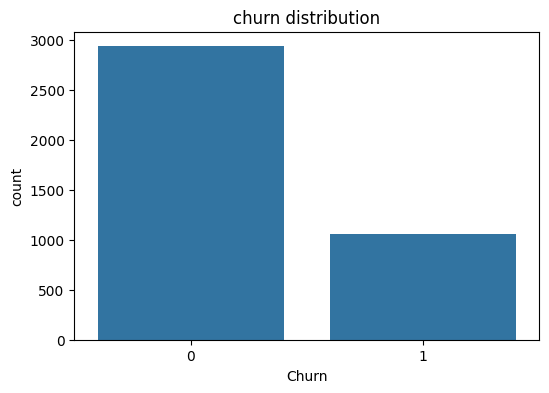

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('churn distribution')
plt.savefig("./image/churn_distribution.png")
plt.show()

## 이상치 탐지

- 평균 추가 지출 금액 vs. 운동 빈도 → 운동을 거의 안 하는데 높은 추가 비용을 지출한 고객 확인.

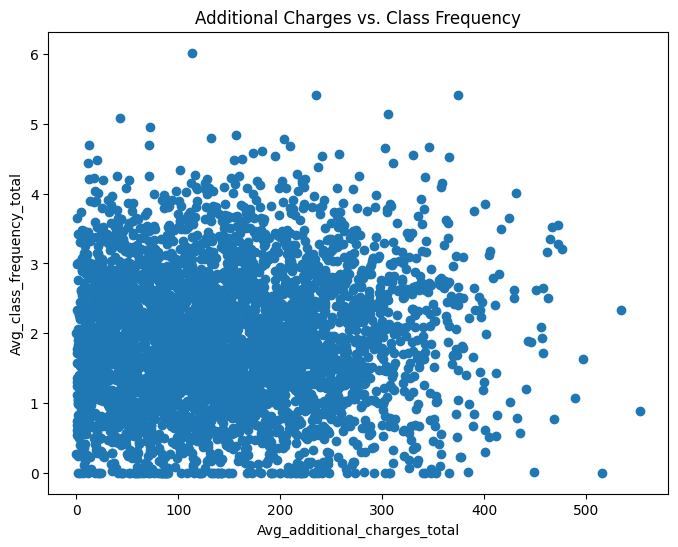

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Avg_additional_charges_total'], df['Avg_class_frequency_total'])
plt.xlabel('Avg_additional_charges_total')
plt.ylabel('Avg_class_frequency_total')
plt.title('Additional Charges vs. Class Frequency')
plt.savefig("./image/Outlier_Detection_1.png")
plt.show()

**결론**
- 추가 지출 금액이 높은데 운동 빈도가 낮은 고객을 이상치로 식별

-----

- 계약 만료 전 남은 개월 수 vs. 이탈 여부 → 거의 끝날 때까지 유지하다가 갑자기 이탈한 고객 탐색.

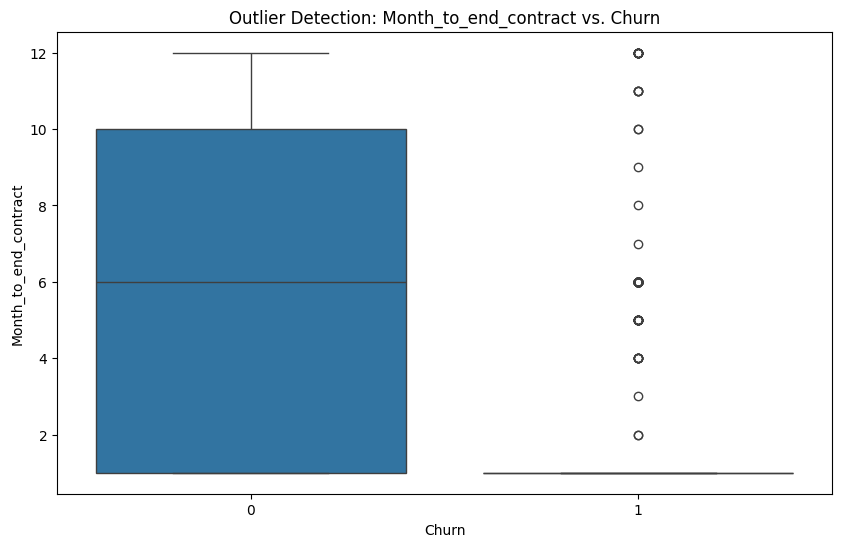

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Month_to_end_contract', data=df)
plt.title('Outlier Detection: Month_to_end_contract vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Month_to_end_contract')
plt.savefig("./image/Outlier_Detection_2.png")
plt.show()

**결론**
- 계약 만료 전 남은 개월 수가 적은 고객들이 이탈할 가능성이 높으며, 이러한 고객을 사전에 식별하여 적절한 유지 전략을 수립하는 것이 중요함

-----

- 이탈 여부에 따른 추가 지출 금액 분포

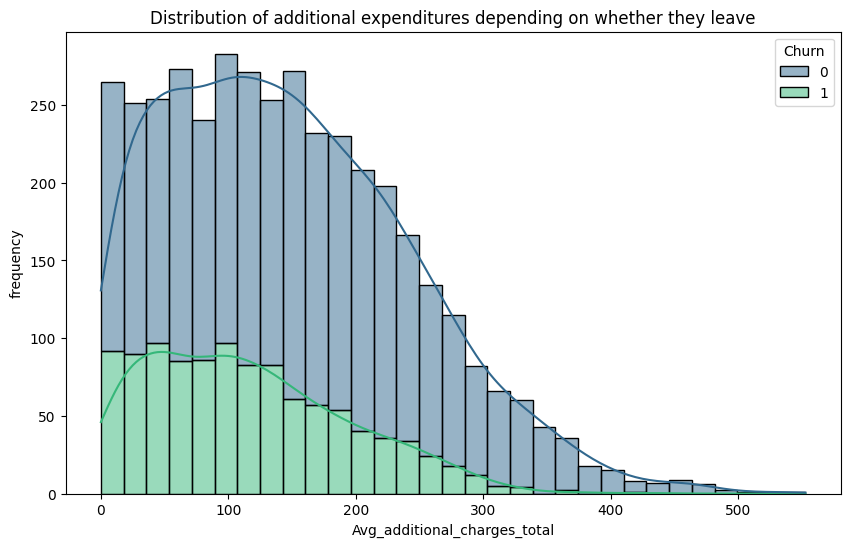

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Avg_additional_charges_total', hue='Churn', kde=True, multiple="stack", palette='viridis')
plt.title('Distribution of additional expenditures depending on whether they leave')
plt.xlabel('Avg_additional_charges_total')
plt.ylabel('frequency')
plt.savefig("./image/additional_xpenditures_churn.png")
plt.show()

**결론**
- 이탈 고객은 낮은 추가 지출 금액을 보이는 반면, 이탈하지 않은 고객은 상대적으로 높은 추가 지출 금액을 유지하는 경향

-----

### 시계열 데이터 분석 (Time Series Analysis)

- 월별 평균 추가 지출 금액 vs. 계약 종료까지 남은 기간 → 재계약 여부와 지출 패턴 비교.

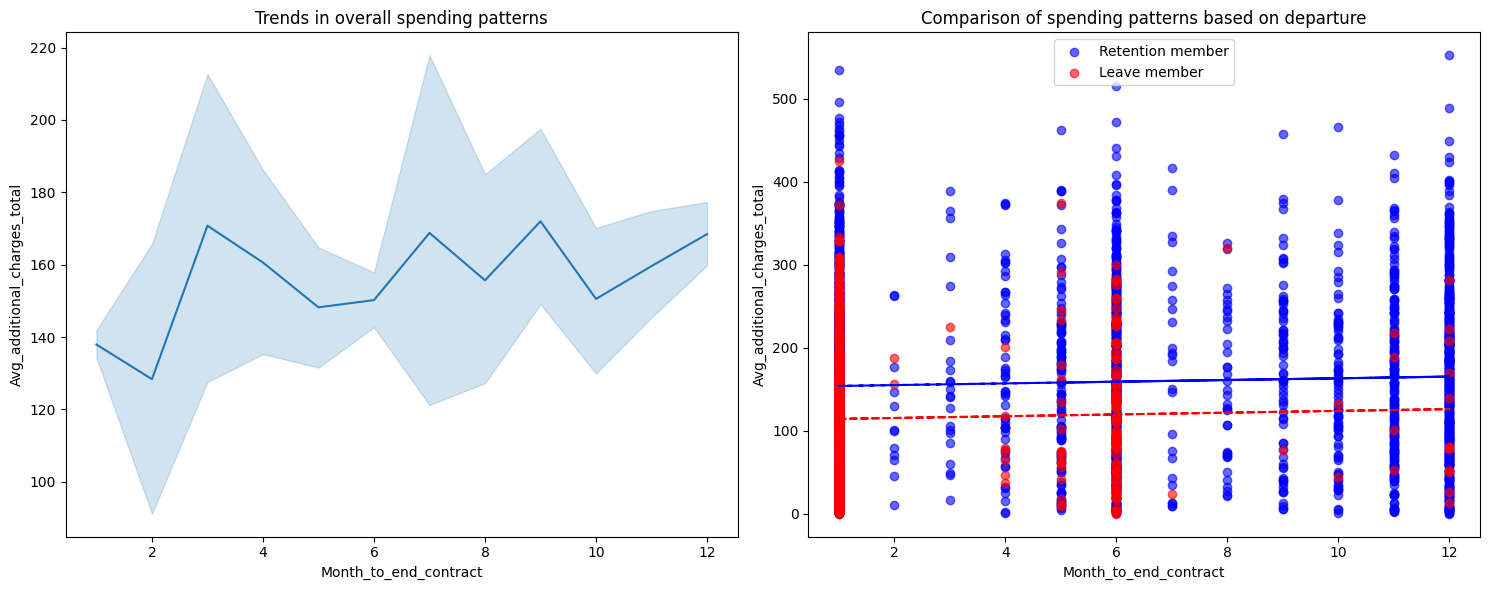


=== 그룹별 통계 요약 ===

유지/이탈 회원 별 평균 지출액:
      Avg_additional_charges_total                 
                              mean        std count
Churn                                              
0                       158.445715  99.801599  2939
1                       115.082899  77.696419  1061


Avg_additional_charges_total                 
                              mean        std count
Churn                                              
0                       158.445715  99.801599  2939
1                       115.082899  77.696419  1061

In [17]:
def analyze_spending_patterns(df):
    # 두 개의 서브플롯 생성
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. 전체 추세 분석 (선 그래프)
    sns.lineplot(x='Month_to_end_contract', 
                y='Avg_additional_charges_total', 
                data=df, 
                ax=ax1)
    ax1.set_title('Trends in overall spending patterns')
    ax1.set_xlabel('Month_to_end_contract')
    ax1.set_ylabel('Avg_additional_charges_total')
    
    # 2. Churn 여부에 따른 scatter plot
    colors = ['blue', 'red']
    labels = ['Retention member', 'Leave member']
    
    for i, churn in enumerate([0, 1]):
        group_data = df[df['Churn'] == churn]
        ax2.scatter(group_data['Month_to_end_contract'], 
                   group_data['Avg_additional_charges_total'],
                   alpha=0.6, c=colors[i], label=labels[i])
        
        # 각 그룹별 추세선
        if len(group_data) > 1:
            z = np.polyfit(group_data['Month_to_end_contract'], 
                          group_data['Avg_additional_charges_total'], 1)
            p = np.poly1d(z)
            ax2.plot(group_data['Month_to_end_contract'], 
                    p(group_data['Month_to_end_contract']), 
                    c=colors[i], linestyle='--')
    
    ax2.set_title('Comparison of spending patterns based on departure')
    ax2.set_xlabel('Month_to_end_contract')
    ax2.set_ylabel('Avg_additional_charges_total')
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig("./image/Time_Series_Analysis.png")
    plt.show()
    
    # 통계 요약
    print("\n=== 그룹별 통계 요약 ===")
    summary = df.groupby('Churn')[['Avg_additional_charges_total']].agg(['mean', 'std', 'count'])
    print("\n유지/이탈 회원 별 평균 지출액:")
    print(summary)
    
    return summary

analyze_spending_patterns(df)

**결론**
- 재계약 고객은 계약 종료가 가까워질수록 추가 지출이 증가하는 반면, 이탈 고객은 계약 종료가 가까워질수록 추가 지출이 감소하는 경향

-----

### 특성별 이탈률 분석

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12320\2007694641.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Contract_period', y='Churn', data=df, ci=None, ax=axes[0, 0])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_12320\2007694641.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age_Group', y='Churn', data=df, ci=None, ax=axes[0, 1])


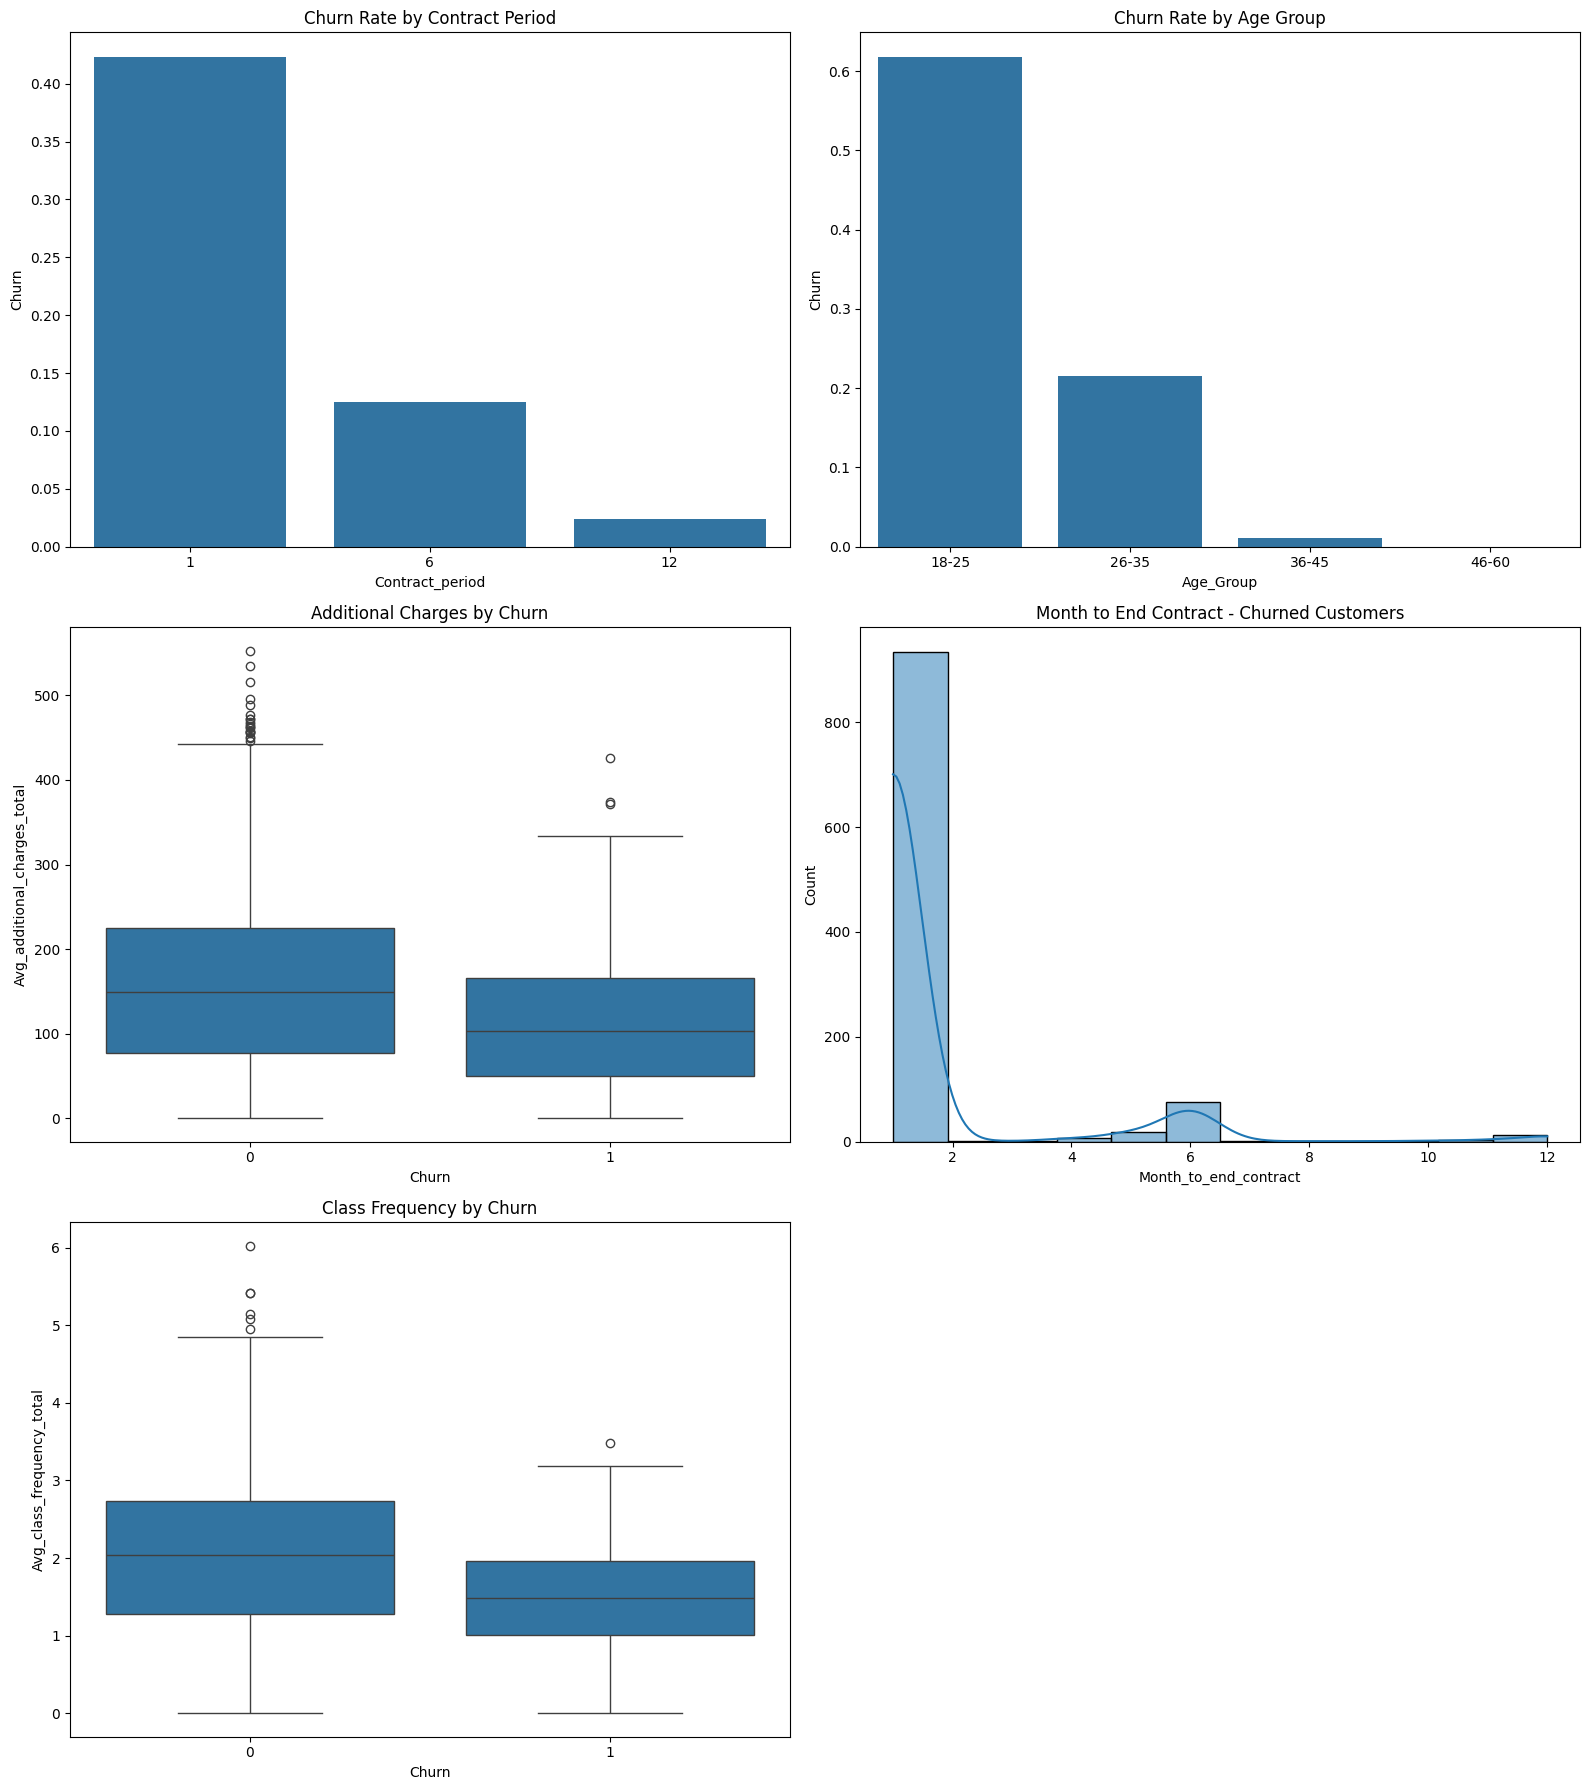

In [18]:
# 계약 기간별, 연령대별, 추가 비용 사용, 계약 종료 기간, 운동 빈도에 따른 이탈률을 하나의 plot으로 통합
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 계약 기간별 이탈률
sns.barplot(x='Contract_period', y='Churn', data=df, ci=None, ax=axes[0, 0])
axes[0, 0].set_title("Churn Rate by Contract Period")

# 연령대별 이탈률
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])
sns.barplot(x='Age_Group', y='Churn', data=df, ci=None, ax=axes[0, 1])
axes[0, 1].set_title("Churn Rate by Age Group")

# 추가 비용 사용과 이탈률 관계
sns.boxplot(x='Churn', y='Avg_additional_charges_total', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Additional Charges by Churn")

# 월별 계약 종료 고객 비율 분석
sns.histplot(df[df['Churn'] == 1]['Month_to_end_contract'], bins=12, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Month to End Contract - Churned Customers")

# 운동 빈도에 따른 이탈률 분석
sns.boxplot(x='Churn', y='Avg_class_frequency_total', data=df, ax=axes[2, 0])
axes[2, 0].set_title("Class Frequency by Churn")

# 빈 서브플롯 제거
# del axes[2, 1]
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.savefig("./image/churn_analysis_combined.png")
plt.show()


### 이탈률 분석 결론

1. **계약 기간별 이탈률**  
   - 단기 계약(1개월)의 이탈률이 가장 높음(약 40% 이상).
   - 6개월 계약에서는 이탈률이 감소하며, 12개월 계약에서는 가장 낮은 수준을 보임.
   - 장기 계약 고객이 더 높은 유지율을 보이는 경향이 있음.

2. **연령대별 이탈률**  
   - 18~25세 연령대에서 가장 높은 이탈률(60% 이상).
   - 26~35세에서는 이탈률이 절반 이하로 감소.
   - 36세 이상에서는 이탈률이 거의 없음.
   - 젊은층 고객이 상대적으로 유지율이 낮고, 나이가 많을수록 헬스장 이용을 지속하는 경향이 있음.

3. **추가 비용 사용과 이탈률**  
   - 이탈 고객과 유지 고객 간 추가 비용(부가 서비스 이용료) 차이는 크지 않음.
   - 다만, 일부 이탈 고객에서 높은 추가 비용을 지출한 사례도 존재.
   - 추가 비용 사용이 이탈률에 큰 영향을 미치지는 않는 것으로 보임.

4. **남은 계약 기간과 이탈률**  
   - 계약 종료까지 남은 기간이 1~2개월인 경우 이탈률이 급격히 증가.
   - 6개월 이상 남은 고객은 이탈 가능성이 거의 없음.
   - 계약 기간이 짧아질수록 이탈 가능성이 높아지는 패턴을 보임.

5. **운동 빈도에 따른 이탈률**  
   - 유지 고객의 평균 운동 빈도가 이탈 고객보다 다소 높음.
   - 하지만 일부 유지 고객도 낮은 운동 빈도를 유지하는 경우 존재.
   - 운동을 꾸준히 할수록 이탈 가능성이 낮아지는 경향이 있으나, 결정적 요인은 아닐 수 있음.

6. **이탈 여부 분포**  
   - 전체 고객 중 약 25~30%가 이탈한 것으로 나타남.
   - 유지 고객이 더 많지만, 이탈 고객 비중도 무시할 수 없는 수준.

#### 종합 결론
- **장기 계약이 이탈 방지에 효과적**  
  → 1개월 계약보다는 6개월 이상 계약 유도가 필요함.  
- **젊은층(18~25세) 고객의 이탈을 방지할 전략 필요**  
  → 멤버십 혜택 제공, 특별 프로모션 도입 가능성 검토.  
- **운동 빈도 증가를 위한 유도책 필요**  
  → 운동 습관을 지속하게 하는 리워드 시스템 고려.  
- **계약 만료 전에 고객 유지 전략 필요**  
  → 1~2개월 남은 고객을 대상으로 재계약 유도 마케팅 필요.

----

### 1. 고객 행동 분석
- **추가 지출 금액**: 고객의 평균 추가 지출 금액은 일반적으로 낮은 금액에 집중되어 있으며, 높은 추가 비용을 지출하는 고객은 드물다는 점은 고객의 소비 패턴을 이해하는 데 중요한 요소입니다. 특히, 높은 추가 지출을 하는 고객들은 이탈 가능성이 낮고, 이탈하지 않은 고객이 더 많은 지출을 하는 경향이 있습니다.

### 2. 계약 기간과 이탈률
- **계약 기간**: 짧은 계약 기간을 가진 고객(1개월 계약)의 이탈률이 가장 높으며, 계약 기간이 길어질수록 이탈률이 감소하는 경향이 있습니다. 이는 장기 계약이 고객 유지에 효과적임을 나타냅니다.

### 3. 연령대와 이탈률
- **연령대**: 젊은 고객층(18-25세)의 이탈률이 높고, 연령이 증가할수록 이탈률이 감소합니다. 이는 젊은 고객들이 대안에 더 민감하게 반응할 가능성이 있음을 시사합니다.

### 4. 운동 빈도와 이탈률
- **운동 빈도**: 운동 빈도가 낮은 고객이 이탈할 가능성이 높으며, 고객의 활동성을 높이는 전략이 필요합니다. 이는 고객의 충성도와 관련된 중요한 지표로 해석될 수 있습니다.

### 5. 계약 종료 임박 고객
- **계약 종료까지 남은 기간**: 계약 종료가 임박한 고객이 이탈하는 경향이 있으며, 이들을 조기에 식별하고 유지 전략을 수립하는 것이 중요합니다.

### 종합 결론
고객의 이탈률은 여러 요인에 의해 영향을 받으며, 특히 계약 기간, 연령대, 추가 지출 금액, 운동 빈도 및 계약 종료까지 남은 기간 등이 주요한 영향을 미침.
- 예를 들어, 젊은 고객에게는 더 많은 혜택을 제공하거나, 짧은 계약 기간을 가진 고객에게는 재계약 유도를 위한 프로모션을 제안할 수 있음.


-----------------

In [20]:
gym_df = pd.read_csv('./data/gym_churn_us.csv')

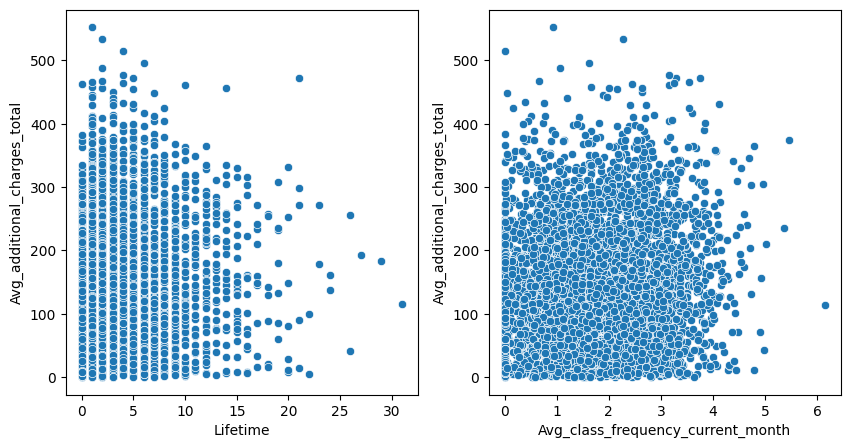

In [21]:
# 추가 지출과 이외 컬럼들의 상관관계 그려보기

fig, ax = plt.subplots(figsize=(10,5), ncols=2)

columns = ['Lifetime', 'Avg_class_frequency_current_month']

for i, col_name in enumerate(columns):
    col = i % 2
    ax_temp = ax[col]

    sns.scatterplot(data=gym_df, x=col_name, y='Avg_additional_charges_total', ax =ax_temp)

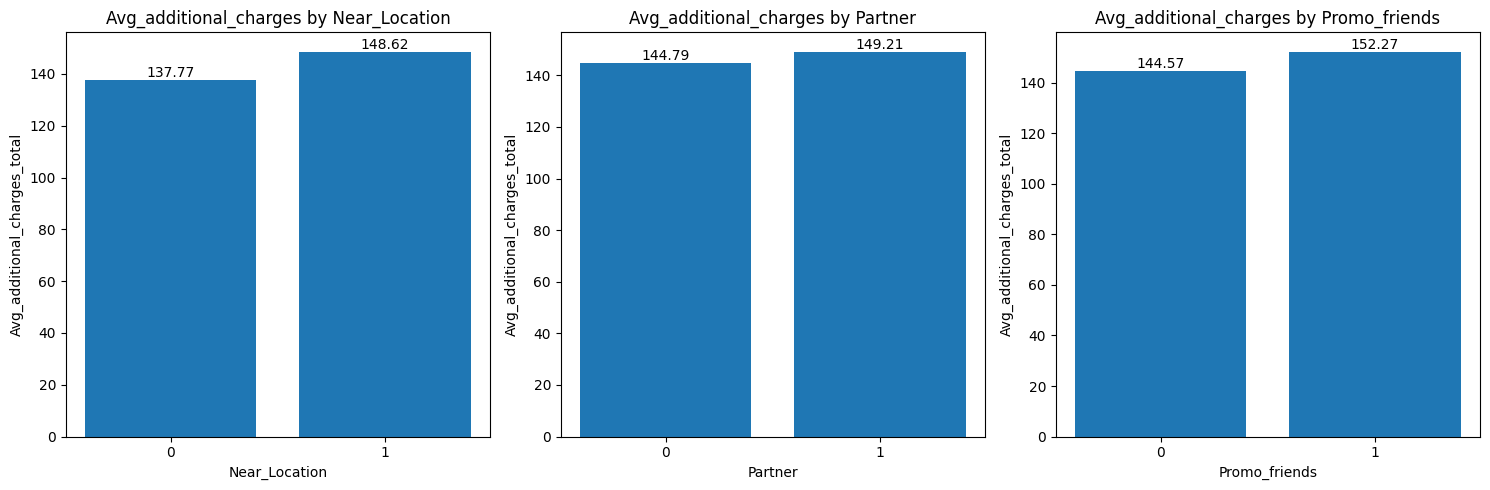

In [28]:
# 이진 분류로 된 컬럼: Near_Location','Partner', 'Promo_friends'
# bar chart 위에 지출 금액의 평균 띄우기!

values = ['Near_Location','Partner', 'Promo_friends']

fig, axs = plt.subplots(1, 3, figsize= (15,5))

for idx, value in enumerate(values):
    y = gym_df.groupby(value)['Avg_additional_charges_total'].mean()

    bars = axs[idx].bar(y.index.astype(str), y.values)
    axs[idx].set_title(f'Avg_additional_charges by {value}')
    axs[idx].set_xlabel(value)
    axs[idx].set_ylabel('Avg_additional_charges_total')

    # 각 bar 위에 평균값을 표시
    for bar in bars:
        yval = bar.get_height()  # 바의 높이 (평균값)
        axs[idx].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2),
                      ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()
